## Imports

In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

In [3]:
%run ../tools/augmentation.py
%run ../cxr14.py
%run ../jsrt.py

In [4]:
dataset = JSRTDataset()
len(dataset)

247

In [5]:
kwargs = {
    'crop': None,
    'translate': None,
    'shear': None,
    'rotation': None,
}

aug_dataset = Augmentator(dataset, dont_shuffle=True, **kwargs)
len(aug_dataset)

	Augmenting all samples:  times=1 new-total=1235 original=247


1235

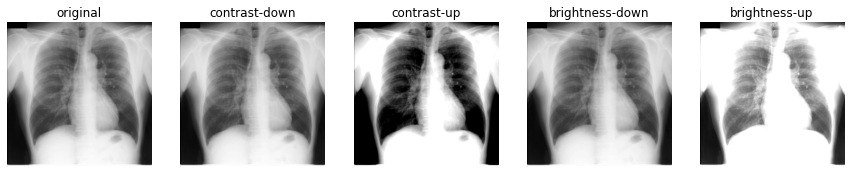

In [6]:
plot_augmented_samples(aug_dataset, 0)

In [7]:
sample_idx = 0
n_methods = len(aug_dataset._aug_fns)

start_idx = sample_idx * (n_methods + 1)
for i, method in enumerate(['original'] + list(aug_dataset._aug_fns)):
    idx = start_idx + i
    image = aug_dataset[idx].image
    print(f'{method:10}\t', image.type(), image.size(), image.min(), image.max())

original  	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1756) tensor(1.4834)
contrast-down	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-0.4107) tensor(0.2206)
contrast-up	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1756) tensor(1.4834)
brightness-down	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1756) tensor(-0.9990)
brightness-up	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1756) tensor(1.4834)
